read excel as dataframe

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
s = pd.read_excel(r"D:\MIT\STARmap\GFP-mCherry\20210407+0430_STARmap\Amplicon_count_based_quantification\sc_STARmap_3_replicates.xlsx",sheet_name = 0)
s2 = s.copy(deep = True) # make a copy of s

determine the cutoff for transfection efficiency
cutoff = 10 * mean(negative control)

In [23]:
well = s["Well"]
name = s["Name"]
index = s["Index"]
mCherry = s["mCherry"]
GFP = s["GFP"]
length = len(well)

ctrl1 = s.loc[s["Index"] == 16,:]
ctrl2 = s.loc[s["Index"] == 17,:]

ctrl_mCherry1 = ctrl1["mCherry"]
ctrl_mCherry2 = ctrl2["mCherry"]
# ctrl_mCherry = ctrl_mCherry1+ctrl_mCherry2

ctrl_GFP1 = ctrl1["GFP"]
ctrl_GFP2 = ctrl2["GFP"]

cutoff_mCherry = 10*(np.sum(ctrl_mCherry1)+np.sum(ctrl_mCherry2))/(len(ctrl_mCherry1)+len(ctrl_mCherry2))
cutoff_GFP = 10*(np.sum(ctrl_GFP1)+np.sum(ctrl_GFP2))/(len(ctrl_GFP1)+len(ctrl_GFP2))
# cutoff = 100*(np.sum(ctrl_mCherry1)+np.sum(ctrl_mCherry2))/(len(ctrl_mCherry1)+len(ctrl_mCherry2))+10*(np.sum(ctrl_GFP1)+np.sum(ctrl_GFP2))/(len(ctrl_GFP1)+len(ctrl_GFP2))
print(cutoff_mCherry)
print(cutoff_GFP)

2.005449591280654
0.6049046321525886


1. count transfected cells
2. exclude untransgected cells
3. calculate transfection efficiencies
4. calculate the mean and median values of GFP/mCherry of each well
5. normalize mean and median values to control

In [24]:
total_index_num = 17

index_count = np.zeros(total_index_num) # number of cells in each sample (3 replicates)
index_count_good = np.zeros(total_index_num) # number of transfected cells in each sample (3 replicates)
cutoff_list = np.zeros(total_index_num)
sc_mean = np.zeros(total_index_num)
sc_median = np.zeros(total_index_num)
sc_mean_norm = np.zeros(total_index_num) # normalized to ligation condition only
sc_median_norm = np.zeros(total_index_num) # normalized to ligation condition only
std = np.zeros(total_index_num) # standard deviation

for i in range(length):
    index_count[index[i]-1] = index_count[index[i]-1]+1
    if (name[i] == 'Transfection only') or (name[i] == 'WT cells only'):
        s["mCherry"][i] = -1 # label negative controls (Transfection only and WT cells only)
    elif name[i] == 'mCherry only':
        if mCherry[i] > cutoff_mCherry:
            index_count_good[index[i]-1] = index_count_good[index[i]-1]+1
        else:
            s["mCherry"][i] = -1 # label untransfeced cells
    else:
        if (mCherry[i] > cutoff_mCherry) and (GFP[i] > cutoff_GFP):
            index_count_good[index[i]-1] = index_count_good[index[i]-1]+1
        else:
            s["mCherry"][i] = -1 # label untransfeced cells
        
eff = np.zeros(total_index_num)
for j in range(total_index_num):
    eff[j] =  index_count_good[j]/index_count[j]   
print(index_count)
print(index_count_good)
print(eff)

# s.drop(index = (s.loc[(s['Intensity_IntegratedIntensity_mCherry'] == '-1')].index),inplace = True) # does not work
s = s.loc[s['mCherry'] != -1,:] # exclude untransfected cells

for j in range(total_index_num):
    ss = s.loc[s["Index"] == j+1,:]
    sc_mean[j] = np.mean(ss["log1p(GFP/mCherry)"])
    sc_median[j] = np.median(ss["log1p(GFP/mCherry)"])
    std[j] = np.std(ss["log1p(GFP/mCherry)"])

for j in range(total_index_num):
    sc_mean_norm[j] = sc_mean[j]-sc_mean[1]
    sc_median_norm[j] = sc_median[j]-sc_median[1]

print(sc_mean)
print(sc_median)    
print(sc_mean_norm)
print(sc_median_norm)
print(std)

<ipython-input-24-b47fbedfa159>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["mCherry"][i] = -1 # label untransfeced cells
<ipython-input-24-b47fbedfa159>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["mCherry"][i] = -1 # label untransfeced cells
<ipython-input-24-b47fbedfa159>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["mCherry"][i] = -1 # label negative controls (Transfection only and WT cells only)


[4122. 4467. 1425. 1166. 1489. 1399. 1338. 1293. 1632. 1606. 1595. 1490.
 2182.  638.  850. 1025.  810.]
[1129. 1773.  852.  935. 1040.  991.  897.  837.  766.  739.  615.  660.
  685.  499.  785.    0.    0.]
[0.27389617 0.39691068 0.59789474 0.80188679 0.69845534 0.70836312
 0.67040359 0.64733179 0.46936275 0.46014944 0.38557994 0.44295302
 0.31393217 0.78213166 0.92352941 0.         0.        ]
[0.94474938 0.91858272 0.8197317  1.65386898 1.24364888 1.41879866
 0.78500265 0.81566368 0.98512115 0.88024    2.02750513 2.04680432
 2.12531488 1.24788374 0.0193723         nan        nan]
[0.84543592 0.8155534  0.7628325  1.61608855 1.22716002 1.39253062
 0.71710296 0.79089672 0.96482356 0.84543592 2.01193526 2.01193526
 2.11489107 1.21431612 0.                nan        nan]
[ 0.02616666  0.         -0.09885102  0.73528626  0.32506616  0.50021594
 -0.13358006 -0.10291904  0.06653843 -0.03834272  1.10892242  1.1282216
  1.20673216  0.32930102 -0.89921042         nan         nan]
[ 0.029882

D:\MySoftware\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\MySoftware\anaconda\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\MySoftware\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\MySoftware\anaconda\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


generate and save violin plots

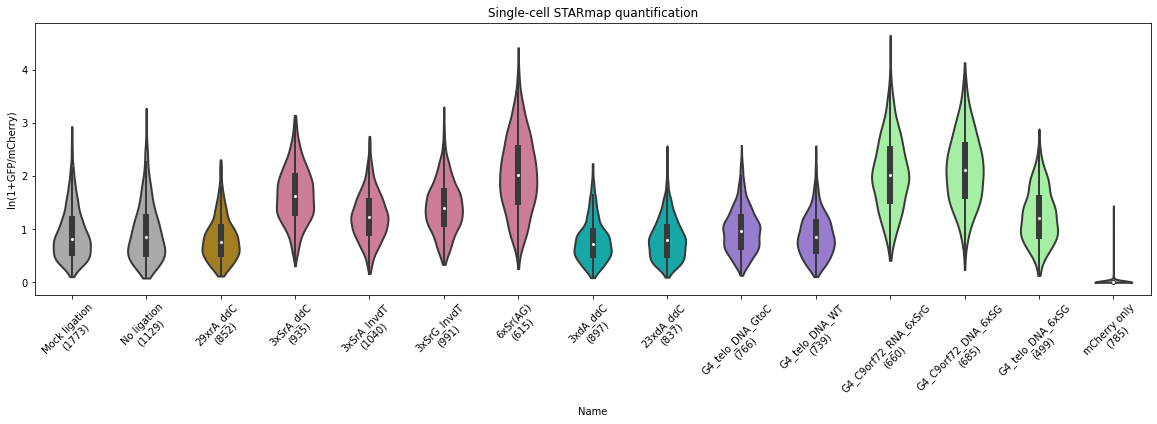

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
plt.title("Single-cell STARmap quantification")
p1 = sns.violinplot(x = s["Name"],y = s["log1p(GFP/mCherry)"],linewidth = 2,width = 0.5,palette = ["darkgrey","darkgrey","darkgoldenrod","palevioletred","palevioletred","palevioletred","palevioletred","c","c","mediumpurple","mediumpurple","palegreen","palegreen","palegreen","darkgrey"],order = ["Mock ligation","No ligation","29xrA_ddC","3xSrA_ddC","3xSrA_InvdT","3xSrG_InvdT","6xSr(AG)","3xdA_ddC","23xdA_ddC","G4_telo_DNA_GtoC","G4_telo_DNA_WT","G4_C9orf72_RNA_6xSrG","G4_C9orf72_DNA_6xSG","G4_telo_DNA_6xSG","mCherry only"],scale = "width",inner = "box",cut = 0)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],["Mock ligation\n(%d)"%(index_count_good[1]),"No ligation\n(%d)"%(index_count_good[0]),"29xrA_ddC\n(%d)"%(index_count_good[2]),"3xSrA_ddC\n(%d)"%(index_count_good[3]),"3xSrA_InvdT\n(%d)"%(index_count_good[4]),"3xSrG_InvdT\n(%d)"%(index_count_good[5]),"6xSr(AG)\n(%d)"%(index_count_good[10]),"3xdA_ddC\n(%d)"%(index_count_good[6]),"23xdA_ddC\n(%d)"%(index_count_good[7]),"G4_telo_DNA_GtoC\n(%d)"%(index_count_good[8]),"G4_telo_DNA_WT\n(%d)"%(index_count_good[9]),"G4_C9orf72_RNA_6xSrG\n(%d)"%(index_count_good[11]),"G4_C9orf72_DNA_6xSG\n(%d)"%(index_count_good[12]),"G4_telo_DNA_6xSG\n(%d)"%(index_count_good[13]),"mCherry only\n(%d)"%(index_count_good[14])],rotation = 45)
# plt.ylim(-0.5,5)
plt.ylabel('ln(1+GFP/mCherry)')
# plt.savefig(r'D:\MIT\STARmap\GFP-mCherry\20210407+0430_STARmap\Amplicon_count_based_quantification\log1p_violinplot.png')
# plt.savefig(r'D:\MIT\STARmap\GFP-mCherry\20210407+0430_STARmap\Amplicon_count_based_quantification\log1p_violinplot.svg',format = "svg")
plt.show()

export transfection data and mean and median values of GFP/mCherry to excel

In [26]:
# list_output = [index_count,index_count_good,eff,cutoff_list,sc_mean,sc_median,sc_mean_norm,sc_median_norm,std]
# df_output = pd.DataFrame(list_output)
# df_output.to_excel(r"D:\MIT\STARmap\GFP-mCherry\20210407+0430_STARmap\list.xlsx")